In [10]:
# Import the required modules
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np


# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas

# Machine Learning
from sklearn.cluster import KMeans, AgglomerativeClustering, Birch
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# suppress warnings
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd

In [11]:
# Load the data into a Pandas DataFrame
df = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [12]:

# Generate summary statistics
df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [14]:
# Plot your data to see what's in your DataFrame
df.hvplot.line(
    width=800,
    height=400,
    rot=45
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41 entries, bitcoin to digibyte
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price_change_percentage_24h   41 non-null     float64
 1   price_change_percentage_7d    41 non-null     float64
 2   price_change_percentage_14d   41 non-null     float64
 3   price_change_percentage_30d   41 non-null     float64
 4   price_change_percentage_60d   41 non-null     float64
 5   price_change_percentage_200d  41 non-null     float64
 6   price_change_percentage_1y    41 non-null     float64
dtypes: float64(7)
memory usage: 2.6+ KB


In [16]:
scaler = StandardScaler()
scaler.fit(df)

StandardScaler()

### Prepare the Data

In [17]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaled_data = scaler.transform(df)
df_scaled = pd.DataFrame(scaled_data, columns=df.columns)
df_scaled.index = df.index # bring back the coins
# df_scaled = df_scaled.reset_index()
df_scaled.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


In [6]:
# Create a DataFrame with the scaled data


# Copy the crypto names from the original data

# Set the coinid column as index


# Display sample data


---

### Find the Best Value for k Using the Original Data.

In [7]:
# Create a list with the number of k-values from 1 to 11


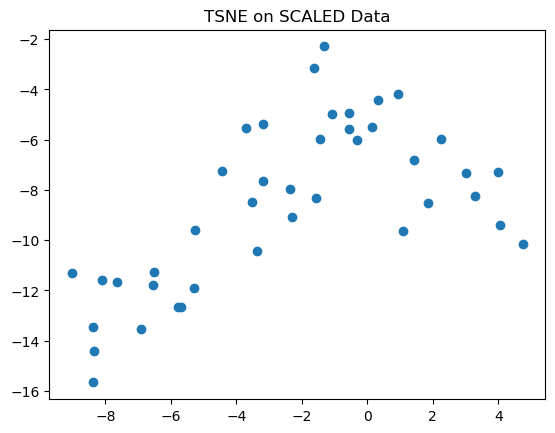

In [18]:
# see if this data can me clustered
tsne = TSNE(perplexity=10)
df_tsne1 = pd.DataFrame(tsne.fit_transform(df_scaled)) # fit scaled data first

# pllot the clusters
plt.scatter(df_tsne1[0], df_tsne1[1])
plt.title("TSNE on SCALED Data")
plt.show()

In [19]:

X = df_scaled

In [20]:

# list to store inertia values
inertia = []
silhouette = []
cha_chas = []

# store the values for k
k = list(range(2, 12 )) # 1 breaks the silhouette score metric
# for loop to evaluate each k
# fit the model
# append the value of the computed inertia from the 'inertia_' attribute of the KMeans odel instance
for i in k:
    #initialize the model
    k_model = KMeans(n_clusters=i, random_state=1)

    # fit the model
    k_model.fit(X)

    # predict the model
    preds = k_model.predict(X)

    # evaluate the model
    inertia.append(k_model.inertia_)
    score = silhouette_score(X, preds)
    silhouette.append(score)

    cha_cha = calinski_harabasz_score(X, preds)
    cha_chas.append(cha_cha)

    

    
# plot the clusters
    print(f"Finished {i} out of {max(k)}")

Finished 2 out of 11
Finished 3 out of 11
Finished 4 out of 11
Finished 5 out of 11
Finished 6 out of 11
Finished 7 out of 11
Finished 8 out of 11
Finished 9 out of 11
Finished 10 out of 11
Finished 11 out of 11


In [21]:
elbow_data = {"k": k, "inertia": inertia, "silhouette_score": silhouette, "cha_score": cha_chas}
df_elbow = pd.DataFrame(elbow_data)

df_elbow["acc"] = df_elbow.inertia.diff()

df_elbow.head(20)

,k,inertia,silhouette_score,cha_score,acc
0,2,195.820218,0.651576,18.159573,NaN
1,3,123.190482,0.702822,25.264783,-72.629736
2,4,79.022435,0.314482,32.459853,-44.168046
3,5,65.405923,0.251511,30.491836,-13.616512
4,6,52.933559,0.293221,30.953239,-12.472365
5,7,47.983124,0.237507,28.227194,-4.950435
6,8,37.288187,0.256063,31.570664,-10.694937
7,9,33.061685,0.205528,30.722973,-4.226502
8,10,28.779752,0.238327,30.904550,-4.281932
9,11,25.248499,0.216166,31.101037,-3.531253


In [22]:
elbow_data = {"k": k, "inertia": inertia, "silhouette_score": silhouette, "cha_score": cha_chas}
df_elbow = pd.DataFrame(elbow_data)

df_elbow["acc"] = df_elbow.inertia.diff()

df_elbow.head(10)

,k,inertia,silhouette_score,cha_score,acc
0,2,195.820218,0.651576,18.159573,NaN
1,3,123.190482,0.702822,25.264783,-72.629736
2,4,79.022435,0.314482,32.459853,-44.168046
3,5,65.405923,0.251511,30.491836,-13.616512
4,6,52.933559,0.293221,30.953239,-12.472365
5,7,47.983124,0.237507,28.227194,-4.950435
6,8,37.288187,0.256063,31.570664,-10.694937
7,9,33.061685,0.205528,30.722973,-4.226502
8,10,28.779752,0.238327,30.904550,-4.281932
9,11,25.248499,0.216166,31.101037,-3.531253


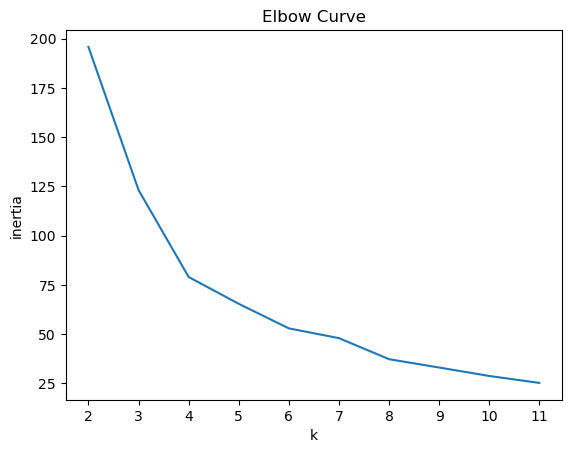

In [23]:
# Plot the DataFrame
plt.plot(df_elbow["k"], df_elbow["inertia"])
plt.title("Elbow Curve")
plt.xticks(df_elbow["k"])
plt.ylabel("inertia")
plt.xlabel("k")
plt.show()

In [24]:
# Check the lengths of k and inertia arrays
print(len(k), len(inertia))

10 10


In [25]:
# Adjust the data or logic to ensure both arrays have the same length
# For example, if k is longer than inertia, you can trim k to match the length of inertia
inertia = inertia[:len(k)]

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** 

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [26]:
# Initialize the K-Means model using the best value for k
best_k = 4
model = KMeans(n_clusters=best_k, random_state=1)

In [27]:
# Exclude non-numeric columns before fitting the model
numeric_data = df.select_dtypes(include=['float64', 'int64'])

In [28]:

# Fit the K-Means model using the scaled data
model.fit(X)

KMeans(n_clusters=4, random_state=1)

In [29]:
# Predict the clusters to group the cryptocurrencies using the scaled data
preds = model.predict(X)

# Print the resulting array of cluster values.
print(preds)


[3 3 1 1 3 3 3 3 3 1 1 1 1 3 1 3 1 1 3 1 1 3 1 1 1 1 1 1 3 1 1 1 0 3 1 1 2
 1 1 1 1]


In [31]:

df_sub2 = df_scaled.copy()

In [32]:

# Add a new column to the DataFrame with the predicted clusters
df_sub2['clusters'] = preds

# Display sample data
df_sub2.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,clusters
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,3
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,3
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,1
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,1
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,3


In [33]:
df_sub2.loc[df_sub2.clusters.isin([1,3])]

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,clusters
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,3
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,3
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,1
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,1
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,3
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533,3
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284,3
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428,3
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351,3


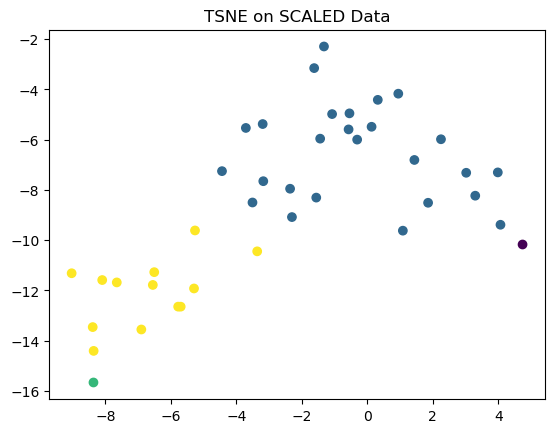

In [34]:
plt.scatter(df_tsne1[0], df_tsne1[1], c=df_sub2.clusters)
plt.title("TSNE on SCALED Data")
plt.show()

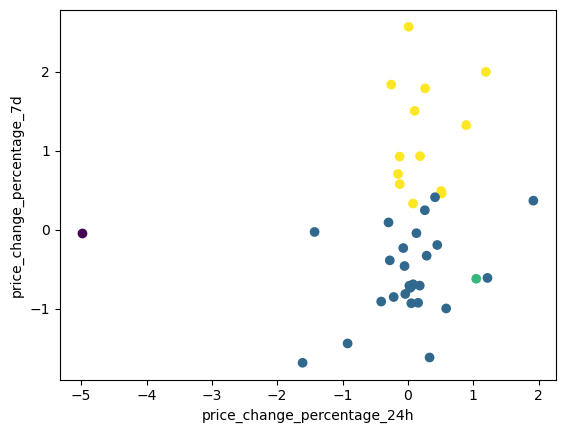

In [35]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.

plt.scatter(df_sub2.price_change_percentage_24h, df_sub2.price_change_percentage_7d, c=df_sub2.clusters)
plt.ylabel("price_change_percentage_7d")
plt.xlabel("price_change_percentage_24h")
plt.show()

In [36]:
df_sub2.reset_index().hvplot.scatter(
    width=800,
    height=400,
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    color="clusters",
    hover_cols="coin_id"
)


:Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,clusters,coin_id)

In [37]:
corrs = df_scaled.corr()
corrs


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
price_change_percentage_24h,1.000000,0.169659,0.279682,0.292563,0.136974,-0.541190,-0.750630
price_change_percentage_7d,0.169659,1.000000,0.538294,0.056899,-0.145099,-0.052533,-0.038424
price_change_percentage_14d,0.279682,0.538294,1.000000,0.658040,0.376108,-0.039086,-0.116632
price_change_percentage_30d,0.292563,0.056899,0.658040,1.000000,0.745248,0.324777,0.016078
price_change_percentage_60d,0.136974,-0.145099,0.376108,0.745248,1.000000,0.499102,0.211242
price_change_percentage_200d,-0.541190,-0.052533,-0.039086,0.324777,0.499102,1.000000,0.879873
price_change_percentage_1y,-0.750630,-0.038424,-0.116632,0.016078,0.211242,0.879873,1.000000


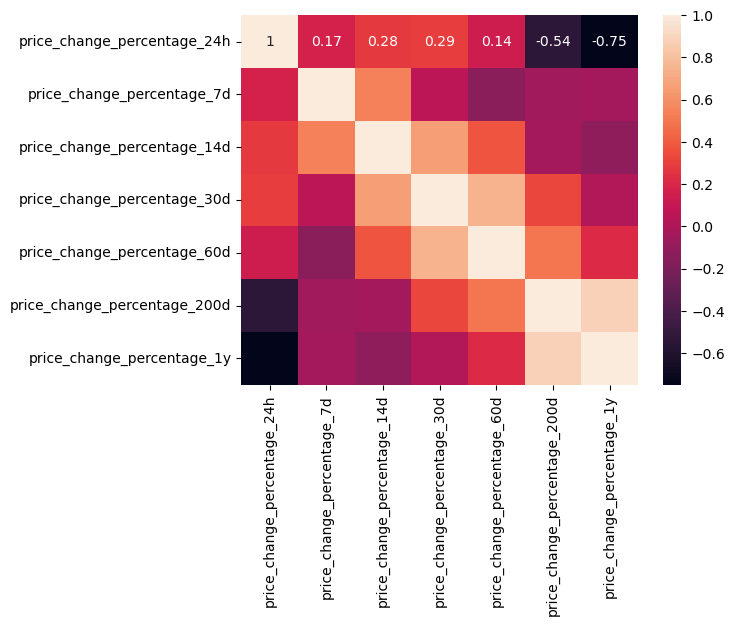

In [38]:

sns.heatmap(corrs, annot=True)
plt.show()

In [39]:
# Init
n_components = len(df_scaled.columns)
pca=PCA(n_components=n_components)

# Fit the PCA model on the transformed DataFrame
pca_data = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(pca_data, columns=["PCA_" + str(x) for x in range(1, n_components + 1)])
df_pca.index = df_scaled.index

df_pca.head()

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7
coin_id,,,,,,,
bitcoin,-0.600667,0.842760,0.461595,-0.109151,-0.033786,-0.225703,0.006595
ethereum,-0.458261,0.458466,0.952877,0.095100,0.014588,0.034158,0.109593
tether,-0.433070,-0.168126,-0.641752,-0.470282,0.115300,-0.127710,-0.086857
ripple,-0.471835,-0.222660,-0.479053,-0.737473,-0.148641,-0.273472,0.134870
bitcoin-cash,-1.157800,2.041209,1.859715,0.236479,-0.191787,-0.411513,-0.070411


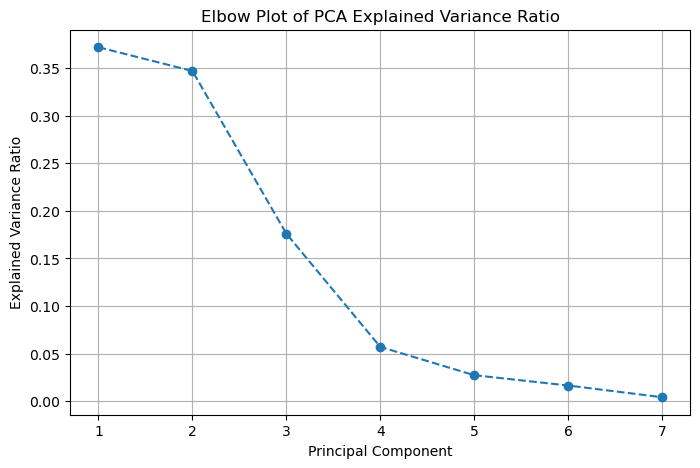

In [40]:
# See if dimensionality reduction will help

# Assume pca.explained_variance_ratio_ is already computed
explained_variance_ratio = pca.explained_variance_ratio_

# Create a DataFrame from the explained variance ratio
df2 = pd.DataFrame({
    'Principal Component': range(1, n_components + 1),
    'Explained Variance Ratio': explained_variance_ratio
})

# Plot the elbow plot
plt.figure(figsize=(8, 5))
plt.plot(df2['Principal Component'], df2['Explained Variance Ratio'], marker='o', linestyle='--')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Elbow Plot of PCA Explained Variance Ratio')
plt.grid(True)
plt.show()

In [41]:

explained_variance_ratio


array([0.3719856 , 0.34700813, 0.17603793, 0.05705673, 0.02729754,
       0.0164632 , 0.00415086])

In [42]:
sum(explained_variance_ratio[0:3])

0.8950316570309841

---

In [43]:
# Create a PCA model instance and set `n_components=3`.
n_components = 3

In [44]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
pca=PCA(n_components=n_components)

# Fit the PCA model on the transformed cryptocurrency DataFrame
pca_data = pca.fit_transform(df_scaled)

# View the first five rows of the DataFrame. 
df_pca = pd.DataFrame(pca_data, columns=["PCA_" + str(x) for x in range(1, n_components + 1)])
df_pca.index = df_scaled.index

df_pca.head()

,PCA_1,PCA_2,PCA_3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


In [45]:

# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
pca.explained_variance_ratio_

array([0.3719856 , 0.34700813, 0.17603793])

In [46]:
# ANSWER THE FOLLOWING QUESTION
# What is the total explained variance of the three prinipal components?
# ANSWER:
sum(explained_variance_ratio[0:3])
# The total variance is 0.895. This explains nearly 90% of the variance.


0.8950316570309841

In [47]:
# Display sample data
df_pca.head()

,PCA_1,PCA_2,PCA_3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


### Optimize Clusters with Principal Component Analysis.

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 

In [48]:
sum(explained_variance_ratio[0:3])


0.8950316570309841

---

### Find the Best Value for k Using the PCA Data

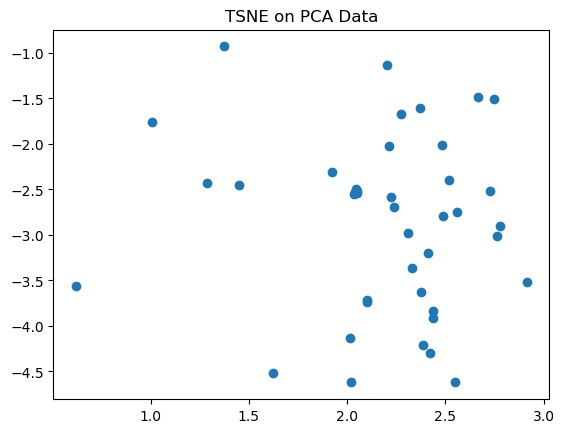

In [49]:

# Create a list with the number of k-values from 1 to 11
# Can this be clustered?
tsne = TSNE()
df_tsne1 = pd.DataFrame(tsne.fit_transform(df_pca)) # fit SCALED data first

# Plot the clusters
plt.scatter(df_tsne1[0], df_tsne1[1])
plt.title("TSNE on PCA Data")
plt.show()

In [51]:

# Create a a list to store inertia values
inertia = []
silhouettes = []
cha_chas = []

# Create a a list to store the values of k
k = list(range(2, 12)) # k =1 breaks the code

# Create a for-loop where each value of k is evaluated using the K-means algorithm
# Fit the model using the spread_df DataFrame
# Append the value of the computed inertia from the `inertia_` attribute of the KMeans model instance
for i in k:
    # initialize the model
    k_model = KMeans(n_clusters=i, random_state=1)
    
    # fit the model
    k_model.fit(X)
    
    # predict the model
    preds = k_model.predict(X)
    
    # evaluate the model (generate the metics)
    inertia.append(k_model.inertia_)
    score = silhouette_score(X, preds)
    silhouettes.append(score)
    
    cha_cha = calinski_harabasz_score(X, preds)
    cha_chas.append(cha_cha)
    
    print(f"Finished {i} out of {max(k)}")

Finished 2 out of 11
Finished 3 out of 11
Finished 4 out of 11
Finished 5 out of 11
Finished 6 out of 11
Finished 7 out of 11
Finished 8 out of 11
Finished 9 out of 11
Finished 10 out of 11
Finished 11 out of 11


In [52]:

# Create a dictionary with the data to plot the Elbow curve

# Create a DataFrame with the data to plot the Elbow curve
elbow_data = {"k": k, "inertia": inertia, "silhouette_score": silhouettes, "cha_score": cha_chas}
df_elbow = pd.DataFrame(elbow_data)

df_elbow["acc"] = df_elbow.inertia.diff()

# Review the DataFrame
df_elbow.head(20)

,k,inertia,silhouette_score,cha_score,acc
0,2,165.901994,0.693036,21.385587,NaN
1,3,93.774626,0.741509,33.046144,-72.127368
2,4,49.665497,0.420800,51.455694,-44.109129
3,5,38.352251,0.407403,51.279819,-11.313245
4,6,27.618972,0.385937,58.104473,-10.733279
5,7,21.134056,0.381437,63.208887,-6.484916
6,8,17.437664,0.344275,64.731818,-3.696392
7,9,13.742792,0.324356,70.766201,-3.694872
8,10,10.484890,0.337084,80.942562,-3.257901
9,11,8.114986,0.358333,91.962860,-2.369905


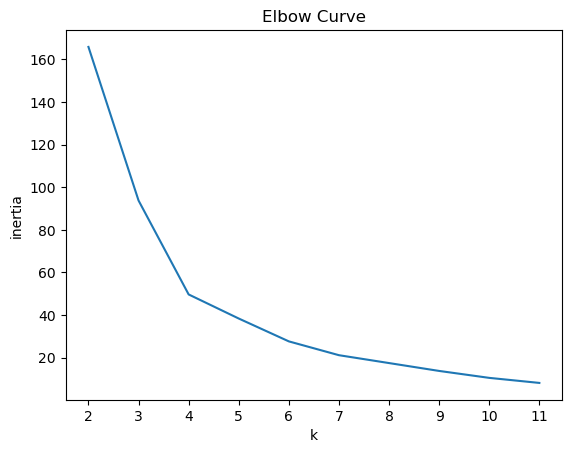

In [53]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
# Plot the DataFrame
plt.plot(df_elbow["k"], df_elbow["inertia"])
plt.title("Elbow Curve")
plt.xticks(df_elbow["k"])
plt.ylabel("inertia")
plt.xlabel("k")
plt.show()

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:**


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** 

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [54]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, random_state=1)

In [55]:
# Fit the K-Means model using the PCA data
model.fit(X)

KMeans(n_clusters=4, random_state=1)

In [56]:
# Predict the clusters to group the cryptocurrencies using the PCA data
preds = model.predict(X)

# Print the resulting array of cluster values.
print(preds)

[1 1 0 0 1 1 1 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 2 1 0 0 3
 0 0 0 0]


In [57]:
# Create a copy of the DataFrame with the PCA data
df_sub2 = df_pca.copy()

# Add a new column to the DataFrame with the predicted clusters
df_sub2['clusters'] = preds

# Display sample data
df_sub2.head()

,PCA_1,PCA_2,PCA_3,clusters
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,1
ethereum,-0.458261,0.458466,0.952877,1
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,1


In [58]:
df_sub2.loc[df_sub2.clusters.isin([1,3])]

,PCA_1,PCA_2,PCA_3,clusters
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,1
ethereum,-0.458261,0.458466,0.952877,1
bitcoin-cash,-1.157800,2.041209,1.859715,1
binancecoin,-0.516534,1.388377,0.804071,1
chainlink,-0.450711,0.517699,2.846143,1
cardano,-0.345600,0.729439,1.478013,1
litecoin,-0.649468,0.432165,0.600303,1
monero,0.060499,2.909404,1.498571,1
tezos,-0.796176,-0.494409,1.082812,1


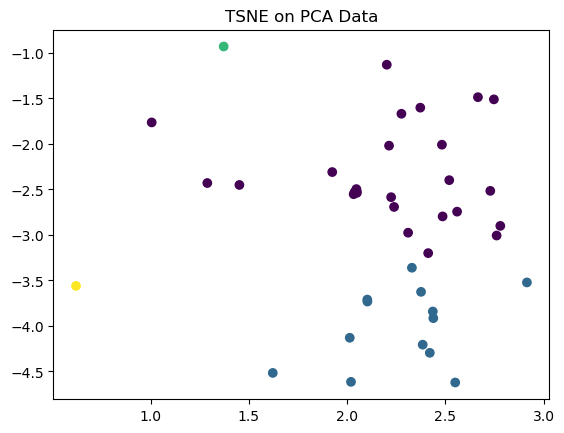

In [59]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
plt.scatter(df_tsne1[0], df_tsne1[1], c=df_sub2.clusters)
plt.title("TSNE on PCA Data")
plt.show()


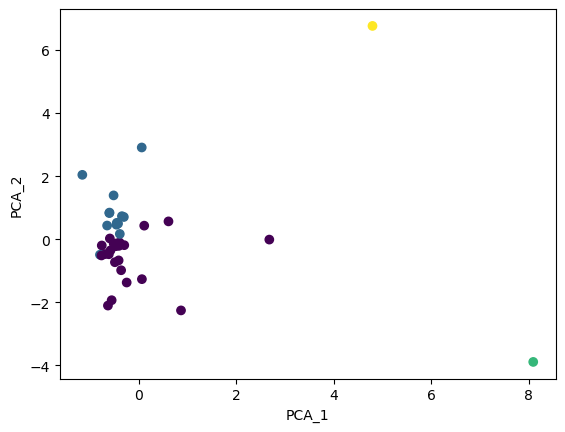

In [60]:
plt.scatter(df_sub2.PCA_1, df_sub2.PCA_2, c=df_sub2.clusters)
plt.ylabel("PCA_2")
plt.xlabel("PCA_1")
plt.show()

In [61]:

# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
df_sub2.reset_index().hvplot.scatter(
    width=800,
    height=400,
    x="PCA_1",
    y="PCA_2",
    color="clusters",
    hover_cols="coin_id"
)

:Scatter   [PCA_1]   (PCA_2,clusters,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [62]:
# Composite plot to contrast the Elbow curves

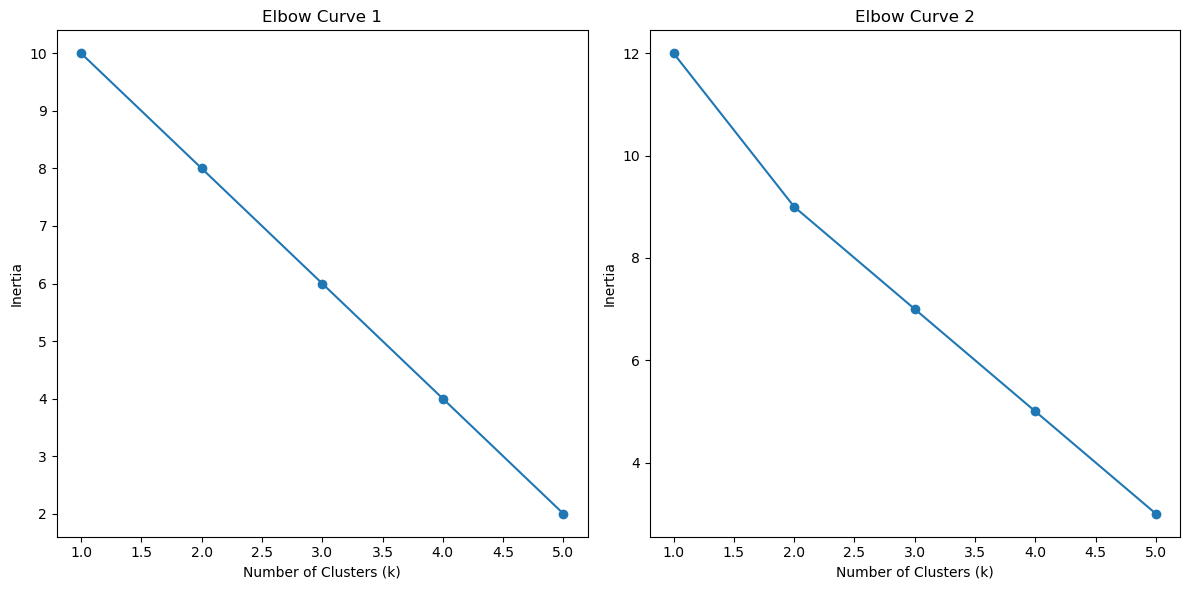

In [63]:
# Composite plot to contrast the clusters
# YOUR CODE HERE!
# Data for Elbow curve 1
k1 = [1, 2, 3, 4, 5]
inertia1 = [10, 8, 6, 4, 2]

# Data for Elbow curve 2
k2 = [1, 2, 3, 4, 5]
inertia2 = [12, 9, 7, 5, 3]

# Create a figure and set of subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot Elbow curve 1
axs[0].plot(k1, inertia1, marker='o')
axs[0].set_title('Elbow Curve 1')
axs[0].set_xlabel('Number of Clusters (k)')
axs[0].set_ylabel('Inertia')

# Plot Elbow curve 2
axs[1].plot(k2, inertia2, marker='o')
axs[1].set_title('Elbow Curve 2')
axs[1].set_xlabel('Number of Clusters (k)')
axs[1].set_ylabel('Inertia')

plt.tight_layout()
plt.show()

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** 